
# Project: Investigate a Moviedatabase to find the best movie to watch tonight!
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook I will load data from a movie database. With this data I will find the all round most popular movie directors. I will then locate their highest rated movie by popularity.

In [59]:
#Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [60]:
# Lets load the moviedata
df = pd.read_csv("filmdata.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Lets look at the shape and description of the dataframe. Lets also drop duplicates

In [61]:
df.shape

(10866, 21)

In [62]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
sum(df.duplicated())

1

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
sum(df.duplicated())

0

Ok. the data seems good so far. Let's have a look at the columns of the dataframe

In [66]:
list(df)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

From the dimensions above id and imdb_id seem irrelevant for us. Homepage is hard to us to use for anything meaningful.
Tagline and overview are strings, which we will also exclude.

In [67]:
df.drop(['id','imdb_id', 'homepage','tagline','overview'],axis=1, inplace=True)


### Data Cleaning (Replace this with more specific notes!)

Lets check the info of the dataframe

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


Okay some rows have missing directors. For the analysis we are looking into we have to drop those rows

In [69]:
df.dropna(subset=['director'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10821 non-null float64
budget                  10821 non-null int64
revenue                 10821 non-null int64
original_title          10821 non-null object
cast                    10751 non-null object
director                10821 non-null object
keywords                9356 non-null object
runtime                 10821 non-null int64
genres                  10800 non-null object
production_companies    9814 non-null object
release_date            10821 non-null object
vote_count              10821 non-null int64
vote_average            10821 non-null float64
release_year            10821 non-null int64
budget_adj              10821 non-null float64
revenue_adj             10821 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


Now the dataframe looks better. It's okay that some rows lack genre, cast, production_companies, and keywords. We will not use these as relevant metrics,
but keep them for potentiel future analysis.

In [71]:
#change date and year to datetime for cleaning
df['release_date'] =pd.to_datetime(df['release_date'])
df['release_year'] =pd.to_datetime(df['release_year'])

Lets find a list of the most productive directors. We will only look at the most productive directors to ensure that
their popularity is all-round high - we might want to binge all their movies tonight!

In [72]:
lst = df['director'].value_counts()[0:30]
len(lst)
dire=lst.keys()
dire

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott', 'Ron Howard', 'Steven Soderbergh', 'Joel Schumacher',
       'Brian De Palma', 'Wes Craven', 'Barry Levinson', 'Tim Burton',
       'Rob Reiner', 'Mike Nichols', 'David Cronenberg', 'John Carpenter',
       'Oliver Stone', 'Robert Zemeckis', 'Walter Hill', 'Tyler Perry',
       'Renny Harlin', 'Sidney Lumet', 'Stephen Frears', 'Peter Hyams',
       'Francis Ford Coppola', 'Norman Jewison', 'Spike Lee', 'Uwe Boll',
       'Tony Scott', 'Roman Polanski'],
      dtype='object')

In [73]:
#Set the df to only include top 30 directors by movies released
df = df[df['director'].isin(dire)]
df.head(100)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,1970-01-01 00:00:00.000002015,9.935996e+07,5.477497e+08
33,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,spy|cia|cold war|pilot|lawyer,141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,2015-10-15,1638,7.1,1970-01-01 00:00:00.000002015,3.679998e+07,1.496016e+08
66,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,suicide|ocean|sea|hunger|shipwreck,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,2015-11-20,805,6.4,1970-01-01 00:00:00.000002015,9.199996e+07,8.631506e+07
83,2.049886,35000000,61181942,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,Robert Zemeckis,1970s|skyscraper|based on true story|tightrope...,123,Adventure|Drama|Thriller,TriStar Pictures|Sony Pictures Entertainment|I...,2015-09-30,706,6.8,1970-01-01 00:00:00.000002015,3.219999e+07,5.628736e+07
155,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,1970-01-01 00:00:00.000002015,1.012000e+07,2.519979e+07
206,0.689579,15000000,3020664,Rock the Kasbah,Bill Murray|Zooey Deschanel|Bruce Willis|Kate ...,Barry Levinson,jealousy|ex-boyfriend|afghanistan|record produ...,100,Comedy|Music|War,Shangri-La Entertainment|QED International|Dun...,2015-10-22,56,5.1,1970-01-01 00:00:00.000002015,1.379999e+07,2.779010e+06
267,0.470124,0,0,Chi-Raq,Teyonah Parris|Nick Cannon|Angela Bassett|Jenn...,Spike Lee,chicago,127,Music|Drama|Crime|Comedy,40 Acres & A Mule Filmworks|Amazon Studios,2015-12-04,33,5.9,1970-01-01 00:00:00.000002015,0.000000e+00,0.000000e+00
280,0.442427,0,3286448,The Program,Ben Foster|Chris O'Dowd|Dustin Hoffman|Jesse P...,Stephen Frears,biography|sport|tour de france,103,Drama,StudioCanal|Working Title Films,2015-09-16,107,5.9,1970-01-01 00:00:00.000002015,0.000000e+00,3.023531e+06
443,0.219603,0,30400,Being Charlie,Nick Robinson|Common|Cary Elwes|Devon Bostick|...,Rob Reiner,drug use,97,Drama|Romance,NaN,2015-09-14,12,6.2,1970-01-01 00:00:00.000002015,0.000000e+00,2.796799e+04
572,0.082569,0,0,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,Martin Scorsese,casino,16,Comedy,RatPac Entertainment|Melco-Crown Entertainment...,2015-10-27,10,6.1,1970-01-01 00:00:00.000002015,0.000000e+00,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis


### Let's find the most popular and productive director

Lets create a plot of the mean value of popularity of movies realeased by the selected director

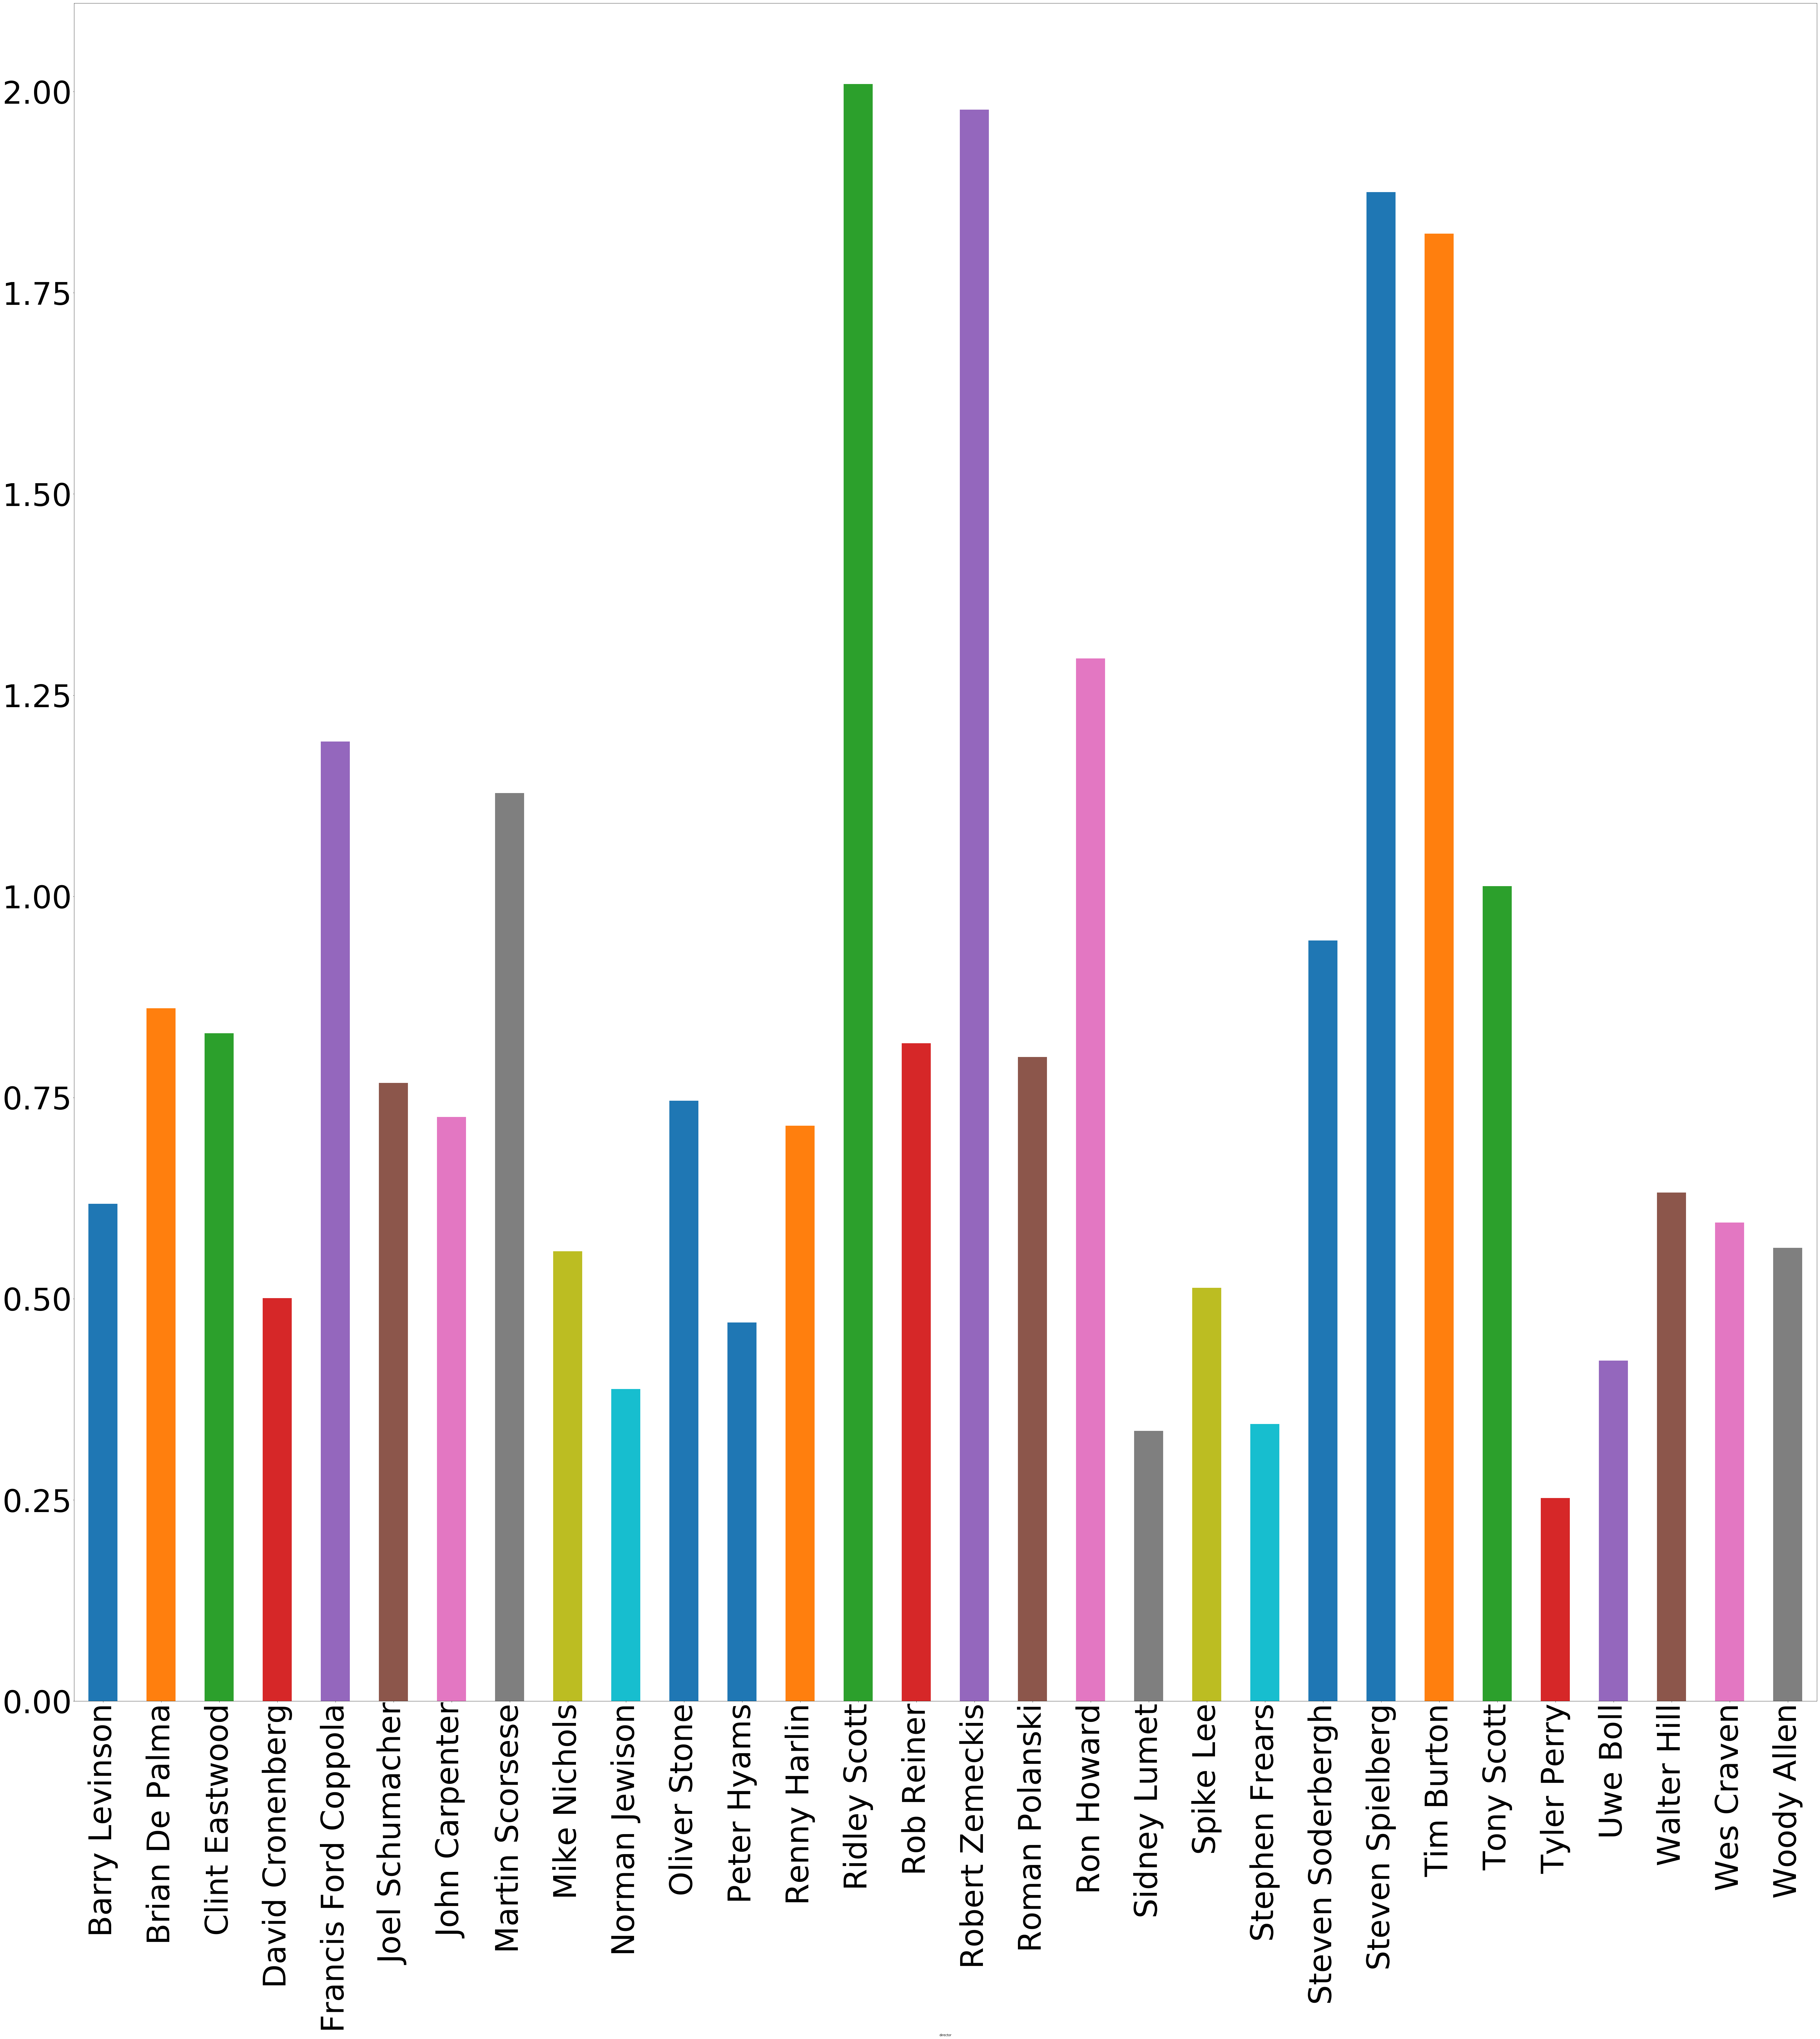

In [74]:
df.groupby(["director"]).popularity.mean().plot(figsize=(100,100),kind='bar',fontsize=100)

It seems that Ridley Scott has the highest all-round popularity. lets list the values to be sure.

In [75]:
sort=df.groupby(["director"]).popularity.mean()

In [76]:
sort.sort_values(ascending=False)

director
Ridley Scott            2.009294
Robert Zemeckis         1.977627
Steven Spielberg        1.875138
Tim Burton              1.823591
Ron Howard              1.295499
Francis Ford Coppola    1.192237
Martin Scorsese         1.128548
Tony Scott              1.012546
Steven Soderbergh       0.945138
Brian De Palma          0.861027
Clint Eastwood          0.830037
Rob Reiner              0.817532
Roman Polanski          0.800541
Joel Schumacher         0.768102
Oliver Stone            0.745900
John Carpenter          0.726061
Renny Harlin            0.715133
Walter Hill             0.632083
Barry Levinson          0.617815
Wes Craven              0.594821
Woody Allen             0.563424
Mike Nichols            0.559013
Spike Lee               0.513782
David Cronenberg        0.500754
Peter Hyams             0.470441
Uwe Boll                0.423006
Norman Jewison          0.387874
Stephen Frears          0.344358
Sidney Lumet            0.335814
Tyler Perry             0.252411
N

Ridley scott has the highest mean value of the chosen directors. Lets find his most popular movie to watch tonight then!

### Let's find the most popular movie by the chosen director!

In [77]:
df2=df.loc[df['director'] == "Ridley Scott"]

In [78]:
df3=df2.sort_values(by=['popularity'],ascending=False)
df3.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,1970-01-01 00:00:00.000002015,9.935996e+07,5.477497e+08
7825,4.935897,11000000,104931801,Alien,Sigourney Weaver|Tom Skerritt|Veronica Cartwri...,Ridley Scott,android|self-destruction|countdown|space marin...,117,Horror|Action|Thriller|Science Fiction,Twentieth Century-Fox Productions|Brandywine P...,1979-05-25,2724,7.6,1970-01-01 00:00:00.000001979,3.305009e+07,3.152733e+08
8661,4.271452,103000000,457640427,Gladiator,Russell Crowe|Joaquin Phoenix|Connie Nielsen|O...,Ridley Scott,rome|gladiator|roman empire|slavery|battlefield,155,Action|Drama|Adventure,DreamWorks SKG|Universal Pictures|Scott Free P...,2000-05-01,3531,7.7,1970-01-01 00:00:00.000002000,1.304281e+08,5.795065e+08
8888,4.215642,28000000,32768670,Blade Runner,Harrison Ford|Rutger Hauer|Sean Young|Edward J...,Ridley Scott,artificial intelligence|man vs machine|cyborg|...,117,Science Fiction|Drama|Thriller,Shaw Brothers|Warner Bros.|The Ladd Company,1982-06-25,2110,7.7,1970-01-01 00:00:00.000001982,6.326999e+07,7.404548e+07
4368,4.008188,130000000,403170142,Prometheus,Noomi Rapace|Michael Fassbender|Charlize Thero...,Ridley Scott,dystopia|alien|imax|self mutilation|aftercredi...,124,Science Fiction|Adventure|Mystery,Twentieth Century Fox Film Corporation|Dune En...,2012-05-30,3559,6.2,1970-01-01 00:00:00.000002012,1.234668e+08,3.829085e+08


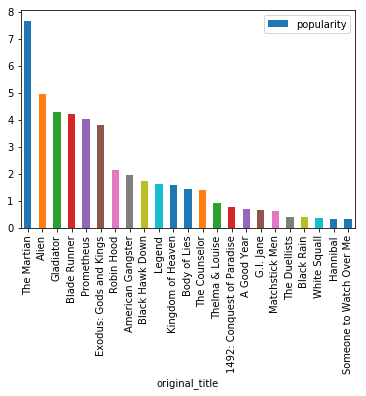

In [79]:
df3.plot(x='original_title', y='popularity',kind='bar')

The Martian is the highest rated movie! Let's see the runtime of the movies to check if we should find an additional movie for binge tonight.

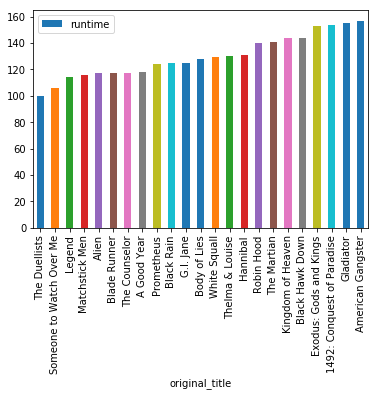

In [80]:
df3 = df3.sort_values('runtime')
df3.plot(x='original_title', y='runtime',kind='bar')

All of Ridley Scotts movie are quite long. The next highest rated is Alien, but I would personally recommend Gladiator instead.

<a id='conclusions'></a>
## Conclusions

We should have entertainment for several nights if we only dig into Ridley Scott. Matchstick men is also quite good even thought the ratings are low in this dataset. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0